In [1]:
# Based on https://www.kaggle.com/code/furioussavenger/birdclef-pytorch

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import librosa
import os
import IPython.display as ipd

In [3]:
import torch
import torchaudio
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, Subset, random_split
from torch.utils.data import Dataset
import torch.nn as nn
import torchvision.models as models
from torchaudio.transforms import MelSpectrogram, Resample
from IPython.display import Audio

In [6]:
SAMPLE_RATE = 32000 # All our audio uses this sample rate

In [7]:
data = pd.read_csv("../data/train_metadata.csv")

In [8]:
sample_path = '../data/train_audio/'+data.iloc[9559]['filename']

In [9]:
sample, rate = torchaudio.load(sample_path)

In [10]:
sample.shape # One channel, 1753757 samples

torch.Size([1, 1753757])

In [11]:
sample = sample.squeeze() # We squeeze it into a 1-D tensor

In [12]:
sample.shape

torch.Size([1753757])

In [13]:
ipd.Audio(sample.numpy(), rate=rate) # Can listen to the audio here

In [14]:
# Now we crop the audio into a 5-second clip
sample = sample[:SAMPLE_RATE*5]

# If we needed to pad the clip, we'd do: sample = torch.nn.functional.pad(sample, (0, num_samples_to_pad))

In [16]:
ipd.Audio(sample.numpy(), rate=rate) # Listen to the cropped audio

In [17]:
# Set up a spectrogram transformation through torch
spectrogram_transform = torchaudio.transforms.Spectrogram(
        n_fft=2048,
        win_length=2048,
        hop_length=512,
        power=2
    )

In [18]:
# Get our spectrogram
spec = spectrogram_transform(sample)

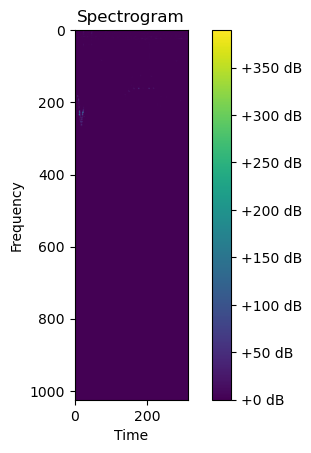

In [19]:
# We plot the spectrogram---we can barely see anything, but there's a little blip around 200 in the
# spectrogram. 
plt.figure()
plt.imshow(spec.numpy(), cmap = 'viridis')
plt.colorbar(format='%+2.0f dB')

plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.show()

In [20]:
# To get a better view, we can rescale to a smaller decibel range
# Below, we create a scaler and apply it
db_scaler = torchaudio.transforms.AmplitudeToDB(stype="power", top_db=80)
spec_db_scaled = db_scaler(spec)

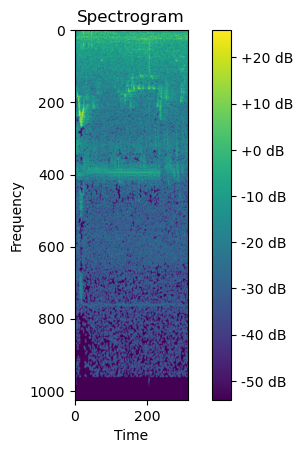

In [21]:
# Now we've scaled, so the spectrogram is a bit easier to read
plt.figure()
plt.imshow(spec_db_scaled.numpy(), cmap = 'viridis')
plt.colorbar(format='%+2.0f dB')

plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.show()

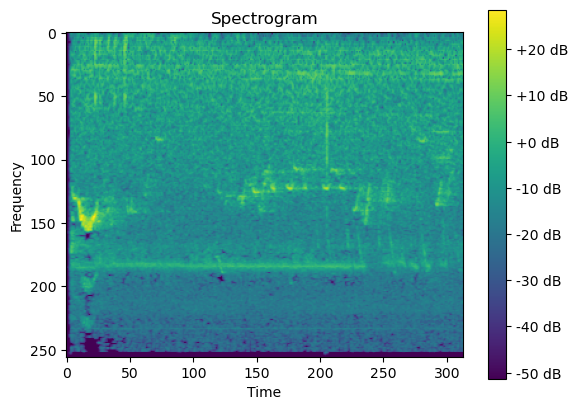

In [26]:
# Here we compare with a Mel spectrogram. The Mel seems to focus on the bird signal better.
mel_spectrogram_transform = torchaudio.transforms.MelScale(
    n_mels=256,
    sample_rate=SAMPLE_RATE,
    f_min=0,
    f_max=16000,
    n_stft=spec.size(0)  # the number of frequency bins in the spectrogram
)
mel_spec = mel_spectrogram_transform(spec)
mel_spec = db_scaler(mel_spec)


plt.figure()
plt.imshow(mel_spec.numpy(), cmap = 'viridis')
plt.colorbar(format='%+2.0f dB')

plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')

plt.show()